#### Observable Trends
1. First
2. Second
3. Third

#### WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

##### Your objective is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


##### Your final notebook must:
* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.


##### As final considerations:
* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See Example Solution for a reference on expected format.

In [1]:
# dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from config import weather_api_key
!pip install citipy
from citipy import citipy
import numpy as np

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# API details
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [3]:
# generate random latitude and longitude list for sample cities

lat_coords = np.random.uniform(low=-90.000, high=90.000, size=700)
lon_coords = np.random.uniform(low=-180.000, high=180.000, size=700)
print(lat_coords)
print(lon_coords)

[-47.15405924   8.28414393   7.31186503 -41.76003045  88.00486003
  76.91820591  21.86540743 -21.27800153 -73.01728921 -51.2291479
  45.75829994 -24.46775437  14.52693649 -62.29868674 -52.86848354
  21.14233615 -44.92543976  -9.0410598  -60.24903948  35.07074277
  41.41542085  86.17569532 -76.04465511 -65.85116197 -49.31791079
 -59.51329383  86.99226304  51.4464753    3.55872411 -31.79731476
  37.91783369  14.29140927  75.58847306  31.72153196  84.0820462
 -58.99856513  64.28880261 -30.06514318  19.4763139   48.77690503
   7.28739126  51.76143849  58.26573363  50.35523648 -23.29226402
  35.33104958  48.26326462  59.95801025 -18.90074652 -21.4381663
 -52.72041881 -20.24317626 -57.35397466  44.98918623 -46.55082003
 -13.75640026  77.18223242 -55.29424592   5.96508978 -21.04160801
 -51.45231807 -64.7974296  -36.85365661 -45.9574835  -74.47276285
 -74.74968971  28.55100034  72.87175471  88.33281709 -59.56555675
 -52.01843616 -85.40000972  27.23837044 -60.24390048  80.36091055
 -81.18950237

In [4]:
# create list of cities from random lat and lon coordinates
cities = []

for x in range(len(lat_coords)):
    city = citipy.nearest_city(lat_coords[x],lon_coords[x])
    cities.append(city.city_name)
    
print(cities)

['rikitea', 'anuradhapura', 'hilo', 'mahebourg', 'illoqqortoormiut', 'khatanga', 'bilma', 'marataizes', 'bluff', 'cape town', 'zhaoyuan', 'walvis bay', 'pochutla', 'taolanaro', 'vaini', 'faya', 'waipawa', 'conceicao do araguaia', 'ushuaia', 'abu kamal', 'torbay', 'chokurdakh', 'rikitea', 'mar del plata', 'bluff', 'punta arenas', 'tuktoyaktuk', 'sitka', 'tarakan', 'northam', 'dongying', 'airai', 'yar-sale', 'darnah', 'tuktoyaktuk', 'hobart', 'turukhansk', 'rio pardo', 'airai', 'grafton', 'butaritari', 'beringovskiy', 'kresttsy', 'aksu', 'marcona', 'lagos', 'sankt florian', 'nikolsk', 'ladario', 'tonota', 'mar del plata', 'rikitea', 'hobart', 'sarkand', 'portland', 'halalo', 'ilulissat', 'hobart', 'butaritari', 'caravelas', 'taolanaro', 'albany', 'mataura', 'bredasdorp', 'mataura', 'hobart', 'marsh harbour', 'ilulissat', 'longyearbyen', 'mar del plata', 'busselton', 'port alfred', 'pacific grove', 'cidreira', 'yellowknife', 'vaini', 'longyearbyen', 'hualmay', 'rikitea', 'ushuaia', 'taola

In [5]:
# set up lists to hold reponse info
city_name = []
latitude = []
temp = []
humidity = []
clouds = []
wind = []

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# loop through the list of cities and perform a request for data on each
record = 1
for city in cities:
    print(query_url + city)
    print(f"City Name: {city}, Record number {record}")
    record += 1
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except (KeyError):
        pass

print(city_name)
print(latitude)
print(temp)
print(humidity)
print(clouds)
print(wind)

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=rikitea
City Name: rikitea, Record number 1
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=anuradhapura
City Name: anuradhapura, Record number 2
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=hilo
City Name: hilo, Record number 3
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=mahebourg
City Name: mahebourg, Record number 4
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=illoqqortoormiut
City Name: illoqqortoormiut, Record number 5
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=khatanga
City Name: khatanga, Record number 6
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=b

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=ilulissat
City Name: ilulissat, Record number 57
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=hobart
City Name: hobart, Record number 58
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=butaritari
City Name: butaritari, Record number 59
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=caravelas
City Name: caravelas, Record number 60
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=taolanaro
City Name: taolanaro, Record number 61
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=albany
City Name: albany, Record number 62
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=mataura
C

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=longyearbyen
City Name: longyearbyen, Record number 112
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=vila velha
City Name: vila velha, Record number 113
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=ushuaia
City Name: ushuaia, Record number 114
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=norman wells
City Name: norman wells, Record number 115
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=rikitea
City Name: rikitea, Record number 116
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=busselton
City Name: busselton, Record number 117
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&un

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=east london
City Name: east london, Record number 167
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=kilindoni
City Name: kilindoni, Record number 168
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=new norfolk
City Name: new norfolk, Record number 169
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=bambous virieux
City Name: bambous virieux, Record number 170
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=mataura
City Name: mataura, Record number 171
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=torit
City Name: torit, Record number 172
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=rikitea
City Name: rikitea, Record number 223
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=new norfolk
City Name: new norfolk, Record number 224
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=bluff
City Name: bluff, Record number 225
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=aksu
City Name: aksu, Record number 226
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=buchanan
City Name: buchanan, Record number 227
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=petropavlovka
City Name: petropavlovka, Record number 228
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=berle

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=tiarei
City Name: tiarei, Record number 279
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=esperance
City Name: esperance, Record number 280
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=bathsheba
City Name: bathsheba, Record number 281
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=mataura
City Name: mataura, Record number 282
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=punta arenas
City Name: punta arenas, Record number 283
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=tuktoyaktuk
City Name: tuktoyaktuk, Record number 284
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=me

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=jamestown
City Name: jamestown, Record number 335
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=khatanga
City Name: khatanga, Record number 336
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=butaritari
City Name: butaritari, Record number 337
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=taolanaro
City Name: taolanaro, Record number 338
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=hithadhoo
City Name: hithadhoo, Record number 339
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=bambous virieux
City Name: bambous virieux, Record number 340
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f0155

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=zabid
City Name: zabid, Record number 390
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=mataura
City Name: mataura, Record number 391
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=westport
City Name: westport, Record number 392
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=mareeba
City Name: mareeba, Record number 393
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=ormara
City Name: ormara, Record number 394
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=bambous virieux
City Name: bambous virieux, Record number 395
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=james

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=rikitea
City Name: rikitea, Record number 445
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=lorengau
City Name: lorengau, Record number 446
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=lorengau
City Name: lorengau, Record number 447
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=atuona
City Name: atuona, Record number 448
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=atuona
City Name: atuona, Record number 449
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=rikitea
City Name: rikitea, Record number 450
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=cape town
City Na

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=tazovskiy
City Name: tazovskiy, Record number 501
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=saskylakh
City Name: saskylakh, Record number 502
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=rungata
City Name: rungata, Record number 503
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=nizhneyansk
City Name: nizhneyansk, Record number 504
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=acara
City Name: acara, Record number 505
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=coquimbo
City Name: coquimbo, Record number 506
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=cap

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=sydney mines
City Name: sydney mines, Record number 557
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=camapua
City Name: camapua, Record number 558
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=thinadhoo
City Name: thinadhoo, Record number 559
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=port hardy
City Name: port hardy, Record number 560
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=pyay
City Name: pyay, Record number 561
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=yellowknife
City Name: yellowknife, Record number 562
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metr

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=busselton
City Name: busselton, Record number 612
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=zirandaro
City Name: zirandaro, Record number 613
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=kota kinabalu
City Name: kota kinabalu, Record number 614
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=tuatapere
City Name: tuatapere, Record number 615
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=punta arenas
City Name: punta arenas, Record number 616
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=port hardy
City Name: port hardy, Record number 617
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f

http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=banjar
City Name: banjar, Record number 667
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=cherskiy
City Name: cherskiy, Record number 668
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=quelimane
City Name: quelimane, Record number 669
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=najran
City Name: najran, Record number 670
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=port alfred
City Name: port alfred, Record number 671
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=hamilton
City Name: hamilton, Record number 672
http://api.openweathermap.org/data/2.5/weather?appid=6d1373c888f1c7bf746eef73f01556df&units=metric&q=rio g

In [7]:
# create a data frame to hold weather data
weather_dict = {
    "City": city_name,
    "Latitude": latitude,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("WeatherData.csv", index=False)

weather_data

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Rikitea,-23.12,27.19,100,44,3.85
1,Anuradhapura,8.34,29.99,66,48,6.07
2,Hilo,19.71,23.90,73,20,2.10
3,Mahebourg,-20.41,28.00,74,75,0.50
4,Khatanga,71.98,-27.47,78,20,3.47
5,Bilma,18.69,10.11,64,0,1.27
6,Marataizes,-21.04,25.61,93,0,7.07
7,Bluff,-23.58,28.66,54,92,8.22
8,Cape Town,-33.93,18.00,93,75,4.10
9,Zhaoyuan,45.52,-9.42,38,0,8.42


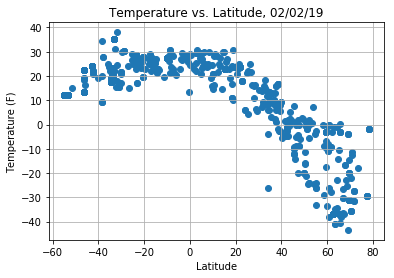

In [8]:
# build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

plt.title("Temperature vs. Latitude, 02/02/19")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempVsLat.png")

# Show plot
plt.show()

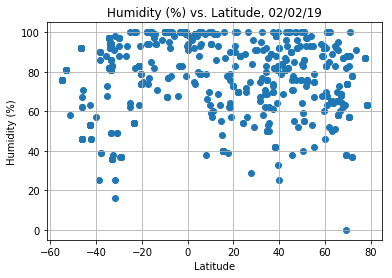

In [9]:
# build a scatter plot for Humidity (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

plt.title("Humidity (%) vs. Latitude, 02/02/19")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityVsLat.png")

# Show plot
plt.show()

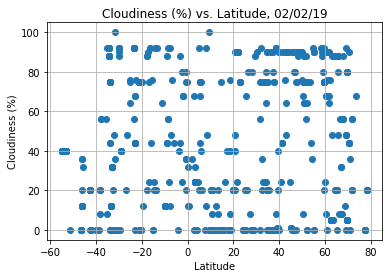

In [10]:
# build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

plt.title("Cloudiness (%) vs. Latitude, 02/02/19")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsVsLat.png")

# Show plot
plt.show()

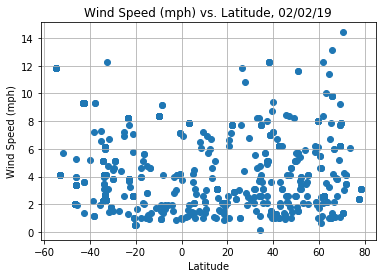

In [11]:
# build a scatter plot for Wind Speed (mph) vs. Latitude
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

plt.title("Wind Speed (mph) vs. Latitude, 02/02/19")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLat.png")

# Show plot
plt.show()